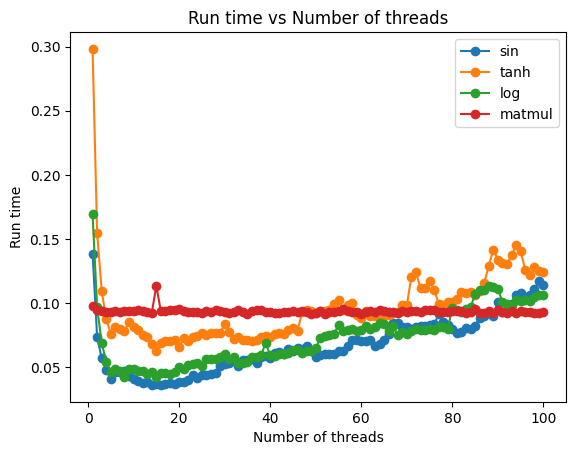

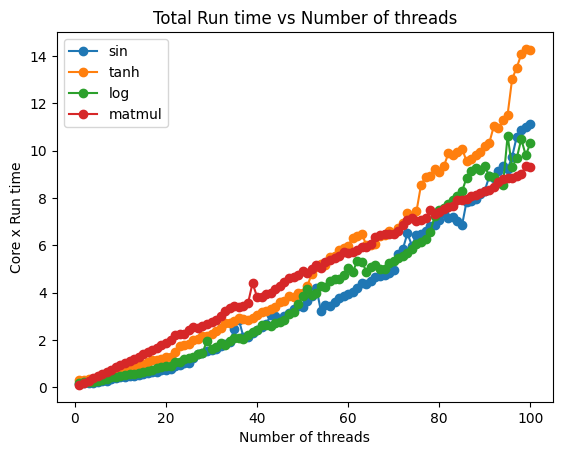

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import time
A = torch.randn(1000, 1000, device='cpu')
B = torch.randn(1000, 1000, device='cpu')
funcs = {
    'sin': lambda a, b: torch.sin(A),
    'tanh': lambda a, b: torch.tanh(A),
    'log': lambda a, b: torch.log(A),
    'matmul': lambda a, b: A @ B.T
}

t = np.zeros(100)
for k, f in funcs.items():
    for i in range(1, len(t) + 1):
        torch.set_num_threads(i)
        c = 0
        t0 = time.time()
        for _ in range(100):
            f(A, B)
        tf = time.time()
        t[i - 1] = (tf - t0)

    plt.plot(np.arange(1, len(t) + 1), t, '-o', label=k)
plt.xlabel('Number of threads')
plt.ylabel('Run time')
plt.title('Run time vs Number of threads')
plt.legend()
plt.show()


t = np.zeros_like(t)
for k, f in funcs.items():
    for i in range(1, len(t) + 1):
        torch.set_num_threads(i)
        c = 0
        t0 = time.time()
        for _ in range(100):
            f(A, B)
        tf = time.time()
        t[i - 1] = (tf - t0) * i

    plt.plot(np.arange(1, len(t) + 1), t, '-o', label=k)
plt.xlabel('Number of threads')
plt.ylabel('Core x Run time')
plt.title('Total Run time vs Number of threads')
plt.legend()
plt.show()

In [ ]:
import torch
import psutil
import pynvml

# Check if CUDA is available
if torch.cuda.is_available():
    pynvml.nvmlInit()
    print("GPU Information:")
    for i in range(torch.cuda.device_count()):
        handle = pynvml.nvmlDeviceGetHandleByIndex(i)
        mem_info = pynvml.nvmlDeviceGetMemoryInfo(handle)
        utilization = pynvml.nvmlDeviceGetUtilizationRates(handle)
        total_mem_gb = mem_info.total / (1024**3)  # Convert bytes to GB
        used_mem_gb = mem_info.used / (1024**3)  # Convert bytes to GB
        free_mem_gb = mem_info.free / (1024**3)  # Convert bytes to GB
        print(
            f"Device {i}: {torch.cuda.get_device_properties(i).name} | Total Memory: {total_mem_gb:.2f} GB | Used Memory: {used_mem_gb:.2f} GB | Free Memory: {free_mem_gb:.2f} GB | Utilization: {utilization.gpu}%"
        )
    pynvml.nvmlShutdown()
else:
    print("CUDA is not available")

# CPU Information
print("\nCPU Information:")
print("Physical cores:", psutil.cpu_count(logical=False))
print("Total cores:", total_cores := psutil.cpu_count(logical=True))

core_percentages = [f"{i}:\t {percentage}%\t" for i, percentage in enumerate(psutil.cpu_percent(percpu=True, interval=1))]
core_percentages_formatted = [" ".join(core_percentages[i : i + 8]) for i in range(0, len(core_percentages), 8)]
for core_group in core_percentages_formatted:
    print(core_group)

# RAM Information
print("\nRAM Information:")
svmem = psutil.virtual_memory()
print(f"Total: {svmem.total / (1024**3):.2f} GB")
print(f"Available: {svmem.available / (1024**3):.2f} GB")
print(f"Used: {svmem.used / (1024**3):.2f} GB")
print(f"Percentage: {svmem.percent}%")

# Check if distributed PyTorch is available
print("\nDistributed PyTorch available:", torch.distributed.is_available())


CUDA is not available

CPU Information:
Physical cores: 16
Total cores: 16
0:	 79.6%	 1:	 35.7%	 2:	 24.5%	 3:	 20.4%	 4:	 99.0%	 5:	 99.0%	 6:	 99.0%	 7:	 99.0%	
8:	 100.0%	 9:	 99.0%	 10:	 99.0%	 11:	 99.0%	 12:	 99.0%	 13:	 99.0%	 14:	 99.0%	 15:	 99.0%	

RAM Information:
Total: 64.00 GB
Available: 33.57 GB
Used: 29.51 GB
Percentage: 47.5%

Distributed PyTorch available: True
